Project 1 Overview:



In [1]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
from api_keys import gkey
from pprint import pprint
import gmaps.datasets
import os
import requests
import json
#import pycountry



In [2]:
gmaps.configure(gkey)

In [3]:
# Reading in Data Set
wine_data = "Resources/white-wine-price-rating.csv"

In [4]:
wine_data = pd.read_csv(wine_data)
wine_data.head()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351


General Analysis
- Wine Data Count - wine_data.count()

In [5]:
wine_data.count()

FullName                   4594
Winery                     4594
WineName                   4594
Year                       4594
Region                     4217
RegionalVariety            4217
VintageRating              4594
VintageRatingCount         4594
WineRating                 4594
WineRatingCount            4594
VintagePrice               4594
WinePrice                  4594
VintageRatingPriceRatio    4594
WineRatingPriceRatio       4594
dtype: int64

In [6]:
#Dropping lines with incomplete information.
wine_data_2 = wine_data.dropna(how="any")
#wine_data_2.count()

In [7]:
#Removed Duplicates
wine_data_nodupes_df= wine_data_2.drop_duplicates(subset=['FullName'])
#wine_data_nodupes_df.count()

In [8]:
wine_data_nodupes_df["Lat"]= ""
wine_data_nodupes_df["Lon"]= ""
wine_data_nodupes_df["Address"]= ""
wine_data_nodupes_df["Country"]= ""
wine_data_nodupes_df



C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Maher\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,,,
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765,,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,,,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,,,
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112,,,,
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744,,,,
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996,,,,
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685,,,,


In [9]:
wine_data_nodupes_df.nunique()

FullName                   4216
Winery                     1081
WineName                   1716
Year                         33
Region                       32
RegionalVariety              31
VintageRating                11
VintageRatingCount          537
WineRating                   13
WineRatingCount            1237
VintagePrice               1888
WinePrice                  1888
VintageRatingPriceRatio    2917
WineRatingPriceRatio       2800
Lat                           1
Lon                           1
Address                       1
Country                       1
dtype: int64

In [10]:
wine_data_regions_nodupes_df= wine_data_nodupes_df.drop_duplicates(subset=['Region'])
wine_data_regions_nodupes_df.head()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,,,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,,,
6,Keller G-Max Riesling 2009,Keller,G-Max Riesling,2009,German,Riesling,4.8,37,4.7,209,2420.000,2420.000,0.001983,0.001942,,,,
7,Château Haut-Brion Pessac-Léognan Blanc (Grand...,Château Haut-Brion,Pessac-Léognan Blanc (Grand Cru Classé de Graves),2005,Bordeaux,White,4.8,39,4.5,820,864.000,864.000,0.005556,0.005208,,,,


Google API Call 
- Calling API Places pulling based on Winery Name + the term "Winery"
- Generating Latitiude and Longitude coordinates
- Map coordinates with a marker map.
- Only trying to pull unique locations to limit the API call and fit within the 600 call a day limit.


In [19]:
grouped = wine_data_nodupes_df.groupby('Region')
base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
#loop through the groups of mice
for name, group in grouped:
    #print("Outer loop")
    for index, row in group.iterrows():
        winery = row['Winery']  
        #print("Checking winery: " + winery + row['Region'])
    #region = row['Region']
        params = {
        "query": winery + "+winery",
        "key": gkey
        }
        response = requests.get(base_url, params=params)

        #print(params)  
        winery_data = response.json()
        status = winery_data["status"]
        if status == "OK":
        #print(status)
            lat = winery_data["results"][0]["geometry"]["location"]["lat"]
            lon = winery_data["results"][0]["geometry"]["location"]["lng"]
            #address = winery_data["results"][0]["formatted_address"]
            #print(lat)
            #print(lon)
            #print(address)
            #print(json.dumps(winery_data, indent=4, sort_keys=True))
            #hotel = hotels_data["results"][0]["name"]
            wine_data_nodupes_df.loc[index, 'Lat'] = lat
            wine_data_nodupes_df.loc[index, 'Lon'] = lon
            #wine_data_nodupes_df.loc[index, 'Address'] = address
            #print("Found result for region: " +row['Region']+', '+ winery)
            break
        else:
            #print(status, winery)
#wine_data_nodupes_df.head()
     

SyntaxError: unexpected EOF while parsing (<ipython-input-19-9b6b7e7131f2>, line 37)

In [20]:
#wine_data_nodupes_df
#wine_data_coords_df = wine_data_nodupes_df[~wine_data_nodupes_df['Lat'].notnull()]
#wine_data_coords_df = wine_data_nodupes_df.dropna()
wine_data_coords_df = wine_data_nodupes_df[wine_data_nodupes_df.Lat != '']
wine_data_coords_df.count()

FullName                   32
Winery                     32
WineName                   32
Year                       32
Region                     32
RegionalVariety            32
VintageRating              32
VintageRatingCount         32
WineRating                 32
WineRatingCount            32
VintagePrice               32
WinePrice                  32
VintageRatingPriceRatio    32
WineRatingPriceRatio       32
Lat                        32
Lon                        32
Address                    32
Country                    32
dtype: int64

In [18]:
fig = gmaps.figure()
locations = wine_data_coords_df[["Lat", "Lon"]]
print(locations)
# Create heat layer
winery_region_location_map = gmaps.marker_layer(locations)

# Add layer
fig.add_layer(winery_region_location_map)

# Display figure
fig

          Lat        Lon
2     38.5285   -122.799
6      38.201   -122.534
8     47.1618    4.95511
15    48.3878    15.5306
18    43.6725    3.57977
30    45.5192    10.9466
32    38.4366   -122.247
34    48.1949    7.32602
111   45.0399    4.83009
139   45.0444  -0.668757
199   42.5435   -2.78758
205   47.2142 -0.0706045
288  -34.9209     138.68
316   47.2973    2.95865
328   46.5829    5.47352
347   44.0619    4.83319
355   41.0399    9.37669
399   42.8296    13.7757
790   41.1538   -7.12045
805  -33.1678   -68.9045
839   41.0104   -95.7026
857   44.7074     8.7819
953   45.2725   -123.016
1046 -41.2486    172.992
1215  42.0911    -8.3203
1281  47.1609    4.95472
1749  47.2009   -1.31441
1831  36.4425    25.4377
2087  43.9552   -77.4456
2808 -34.6171   -71.2511
2981  39.2901    -7.3946
3934   40.451    22.9249


Figure(layout=FigureLayout(height='420px'))

In [22]:
#Age Demographics - Binned into bins of 4 years.  
#bins = [0, 10, 14, 19, 24, 29, 34, 39, 45]

# Create the names for the five bins
#age_groups = ["<10", "11-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

#purchase_file_df["Age Summary"] = pd.cut(purchase_file_df["Age"], bins, labels=age_groups, include_lowest=True)
#purchase_file_df

#Wine pricing - binning  at $10 increments up to $100.    
bins = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]


#Wine pricing - binning  at $10 increments up to $100.    
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 5000]

# Create the names for the five bins
wine_pricing = ["<$9.99", "$10-$19.99", "$20-$29.99", "$30-$39.99", "$40-$49.99", "$50-$59.99", "$60-$69.99", "$70-$79.99", "$80-$89.99", "$90-$99.99", "$100<"]

wine_data_nodupes_df.head()

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio,Lat,Lon,Address,Country
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827,,,,
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765,,,,
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268,38.5285,-122.799,,
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327,,,,
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351,,,,


In [23]:
# Removing records with price >$100
wine_under_100_df = wine_data_nodupes_df[wine_data_nodupes_df['WinePrice'] < 100]
#wine_under_100_df

In [24]:
wine_under_100_df.describe()

,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000
mean,4.165650,142.654752,4.112554,1271.537344,43.043981,43.043981,0.115708,0.113977
std,0.134855,260.087852,0.140987,2162.933513,19.739198,19.739198,0.045180,0.043940
min,3.900000,25.000000,3.500000,28.000000,15.020000,15.020000,0.040076,0.041408
25%,4.100000,41.000000,4.000000,358.000000,27.280000,27.280000,0.076378,0.076268
50%,4.200000,73.000000,4.100000,685.000000,37.390000,37.390000,0.111702,0.110795
75%,4.300000,145.000000,4.200000,1417.000000,55.000000,55.000000,0.150128,0.148148
max,4.700000,6883.000000,4.600000,37863.000000,99.980000,99.980000,0.272969,0.259654


In [25]:
#Price Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WinePrice"].var()
med_stat= wine_under_100_df.groupby('Region')["WinePrice"].median()
std_stat= wine_under_100_df.groupby('Region')["WinePrice"].std()
men_stat= wine_under_100_df.groupby('Region')["WinePrice"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WinePrice"].sem()

wine_region_price_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_region_price_stats_df

In [26]:
#Ratings Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRating"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRating"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRating"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRating"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRating"].sem()

wine_ratings_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_ratings_region_stats_df

In [27]:
#Wine Ratings Ratio Analysis by Region
var_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].var()
med_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].median()
std_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].std()
men_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].mean()
sem_stat= wine_under_100_df.groupby('Region')["WineRatingPriceRatio"].sem()

wine_ratingsratio_region_stats_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
#wine_ratingsratio_region_stats_df

In [28]:
highly_rate_ratio_regions = wine_ratingsratio_region_stats_df[wine_ratingsratio_region_stats_df['Mean'] > 0.135]
#highly_rate_ratio_regions

Text(0, 0.5, 'Wine Ratings')

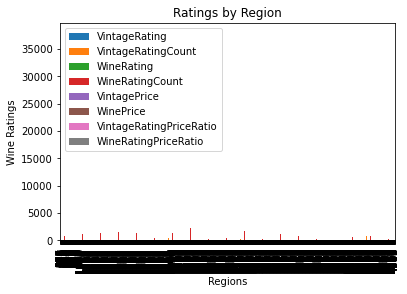

In [29]:

Ratings_wines_by_region_df = wine_under_100_df.groupby("Region").mean()


#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
wine_under_100_df.plot(kind="bar")
plt.title("Ratings by Region")
plt.xlabel("Regions")
plt.ylabel("Wine Ratings")
#plt.show()

In [ ]:
mean_price_wines_by_region_df = wine_under_100_df.groupby("Region")["WinePrice"].mean()


#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
wine_under_100_df.plot(kind="bar")
plt.title("Average Price by Region")
plt.xlabel("Regions")
plt.ylabel("Average Price")
#plt.show()

Text(0, 0.5, 'Average Price')

In [ ]:
reset_wine_df= wine_under_100_df.reset_index()
x_data = range(len(reset_wine_df["Region"]))
y_data = reset_wine_df["Region"]
plt.bar(x_data, y_data)
plt.title("Number of Wine Regions")
plt.xlabel("Wine Region")
plt.ylabel("Number of Wine Regions")
plt.xticks(x_data, (reset_wine_df["WineRegions"]), rotation='vertical')
#plt.show()

In [ ]:
overall_wine_stats_df = pd.merge(wine_ratings_region_stats_df, wine_region_price_stats_df,
                                 how='outer', on='Region')

overall_wine_stats_df

In [ ]:
overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_x": "Ratings Variance", "Median_x": "Ratings Median", "Mean_x": "Ratings Mean",
                                      "Standard Dev_x": "Ratings Stand Dev", "SEM_x": "Ratings SEM"})

overall_wine_stats_df = overall_wine_stats_df.rename(columns={"Variance_y": "Price Variance", "Median_y": "Price Median", "Mean_y": "Price Mean",
                                      "Standard Dev_y": "Price Stand Dev", "SEM_y": "Price SEM"})

overall_wine_stats_df

In [ ]:
plt.title("Price vs Ratings")
plt.xlabel("WinePrice")
plt.ylabel("WineRating")
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRating"], alpha = 0.5)


In [ ]:
plt.title("Price vs Ratings Ratio")
plt.xlabel("WinePrice")
plt.ylabel("WineRatingPriceRatio")
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRatingPriceRatio"], alpha = 0.5)


In [ ]:
plt.title("Ratings vs Ratings Ratio")
plt.xlabel("WineRatingPriceRatio")
plt.ylabel("WineRating")
plt.scatter(wine_under_100_df["WineRatingPriceRatio"], wine_under_100_df["WineRating"], alpha = 0.5)


In [ ]:
plt.scatter(wine_under_100_df["WinePrice"], wine_under_100_df["WineRatingPriceRatio"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wine_under_100_df["WinePrice"],wine_under_100_df["WineRatingPriceRatio"])
regress_values = (wine_under_100_df["WinePrice"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(wine_under_100_df["WinePrice"],wine_under_100_df["WineRatingPriceRatio"])
plt.plot(wine_under_100_df["WinePrice"],regress_values,"b-")
plt.annotate(line_eq,(20,0.05),fontsize=15,color="red")
plt.title("Wine Price - Ratings Ratio")
plt.xlabel('Wine Price')
plt.ylabel('Wine Ratings Price Ratio')
#plt.savefig('northhem_maxtemp_lat.png')
plt.show()
